# 🔺 Combinaciones Lineales en $\mathbb{R}^3$

En esta lección exploraremos cómo los vectores en el espacio tridimensional pueden combinarse para **generar líneas, planos o todo $\mathbb{R}^3$**, dependiendo de su **independencia lineal**.  

Verás cómo interpretar geométricamente estos casos y cómo analizarlos mediante programación con Python.

---

## 🔹 1. Concepto de combinación lineal

### 📘 Definición

Una **combinación lineal** de vectores en $\mathbb{R}^3$ es cualquier vector que se obtiene al multiplicar cada vector por un escalar y sumarlos:

$$
\mathbf{u} = \alpha_1\mathbf{v_1} + \alpha_2\mathbf{v_2} + \alpha_3\mathbf{v_3}
$$

donde $\alpha_1, \alpha_2, \alpha_3 \in \mathbb{R}$.

---

### 💡 Interpretación geométrica

- Si usamos **un solo vector**, sus combinaciones lineales forman una **recta** que pasa por el origen.  
- Si usamos **dos vectores no colineales**, las combinaciones lineales forman un **plano** que pasa por el origen.  
- Si usamos **tres vectores no coplanarios**, las combinaciones lineales generan **todo el espacio $\mathbb{R}^3$**.

---

## 🔹 2. Generación de líneas, planos y el espacio completo

### 🧭 Ejemplo 1: un solo vector → una línea

<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_56929/4290517506.py:17: SyntaxWarning: invalid escape sequence '\m'
  ax.set_title("Combinaciones lineales de un vector en $\mathbb{R}^3$")


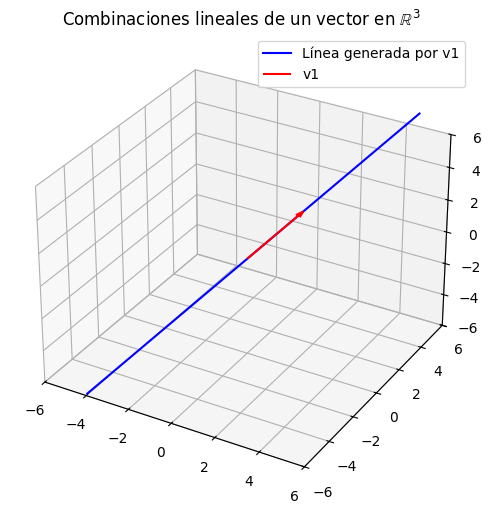

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

v1 = np.array([2, 1, 3])
t = np.linspace(-3, 3, 20)
linea = np.array([t * v1[0], t * v1[1], t * v1[2]])

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(linea[0], linea[1], linea[2], color='blue', label='Línea generada por v1')
ax.quiver(0, 0, 0, *v1, color='red', label='v1', arrow_length_ratio=0.1)
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_zlim(-6, 6)
ax.legend()
ax.set_title("Combinaciones lineales de un vector en $\mathbb{R}^3$")
plt.show()

> Un solo vector genera **todas las combinaciones escalares** de sí mismo: una **recta** por el origen.

---

### 🧭 Ejemplo 2: dos vectores → un plano

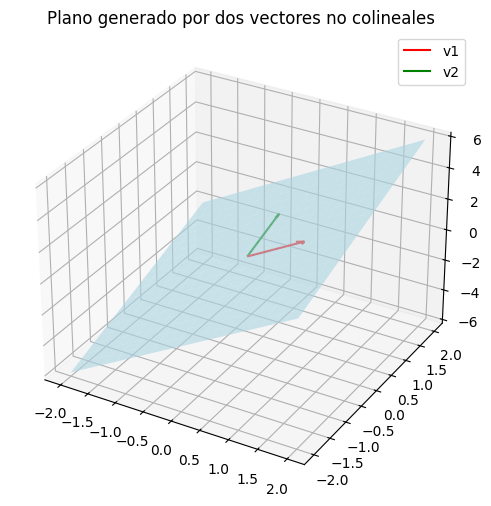

In [2]:
v1 = np.array([1, 0, 2])
v2 = np.array([0, 1, 1])

a = np.linspace(-2, 2, 20)
b = np.linspace(-2, 2, 20)

# Generar malla de combinaciones lineales
A, B = np.meshgrid(a, b)
X = A * v1[0] + B * v2[0]
Y = A * v1[1] + B * v2[1]
Z = A * v1[2] + B * v2[2]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, color='lightblue', alpha=0.6)
ax.quiver(0,0,0,*v1,color='red',arrow_length_ratio=0.1,label='v1')
ax.quiver(0,0,0,*v2,color='green',arrow_length_ratio=0.1,label='v2')
ax.legend()
ax.set_title("Plano generado por dos vectores no colineales")
plt.show()


> Dos vectores no colineales generan un **plano** que pasa por el origen.

---

### 🧭 Ejemplo 3: tres vectores → todo el espacio


In [3]:
v1 = np.array([1, 0, 0])
v2 = np.array([0, 1, 0])
v3 = np.array([0, 0, 1])

# Determinante distinto de cero indica independencia
matriz = np.column_stack((v1, v2, v3))
det = np.linalg.det(matriz)
print(f"Determinante = {det:.2f}")

if not np.isclose(det, 0):
    print("✅ Los tres vectores generan todo el espacio R³ (son independientes).")
else:
    print("❌ Los vectores son dependientes.")


Determinante = 1.00
✅ Los tres vectores generan todo el espacio R³ (son independientes).


> Cuando el **determinante** de la matriz formada por los vectores es distinto de cero, el conjunto **genera todo $\mathbb{R}^3$**.

---

## 🔹 3. Dependencia e independencia lineal

### 📘 Definición

Los vectores $\mathbf{v_1}, \mathbf{v_2}, \mathbf{v_3}$ son:

* **Linealmente independientes** si
  $$
  \alpha_1\mathbf{v_1} + \alpha_2\mathbf{v_2} + \alpha_3\mathbf{v_3} = \mathbf{0}
  \Rightarrow \alpha_1 = \alpha_2 = \alpha_3 = 0
  $$
* **Dependientes** si existe alguna combinación no trivial (con algún $\alpha_i \neq 0$) que da el vector nulo.

---

### 💻 Ejemplo: verificar independencia

In [4]:
def son_independientes(*vectores):
    matriz = np.column_stack(vectores)
    det = np.linalg.det(matriz)
    return not np.isclose(det, 0), det

v1 = np.array([1, 2, 3])
v2 = np.array([2, 1, 0])
v3 = np.array([3, 3, 3])

indep, det = son_independientes(v1, v2, v3)
print(f"¿Son independientes? {indep} (Determinante = {det:.2f})")

¿Son independientes? False (Determinante = 0.00)


> Si el determinante es **0**, los vectores son dependientes → están en el mismo plano o línea.

---

## 🔹 4. Espacio generado y bases

El **espacio generado** por un conjunto de vectores es el conjunto de todas sus combinaciones lineales.
Si los vectores son **independientes** y generan todo el espacio, forman una **base**.

---

### 💡 Ejemplo: base estándar de $\mathbb{R}^3$

$$
\mathcal{B} = { \mathbf{e_1}=(1,0,0),; \mathbf{e_2}=(0,1,0),; \mathbf{e_3}=(0,0,1) }
$$

Cada vector en $\mathbb{R}^3$ puede escribirse como:

$$
\mathbf{v} = x\mathbf{e_1} + y\mathbf{e_2} + z\mathbf{e_3}
$$

---

### 💻 Ejemplo en código

In [5]:
# Base estándar
e1 = np.array([1, 0, 0])
e2 = np.array([0, 1, 0])
e3 = np.array([0, 0, 1])

# Cualquier vector como combinación
v = 3*e1 + 2*e2 + 5*e3
print("Vector generado:", v)

Vector generado: [3 2 5]


---

## 🔹 5. Visualización: línea, plano y espacio

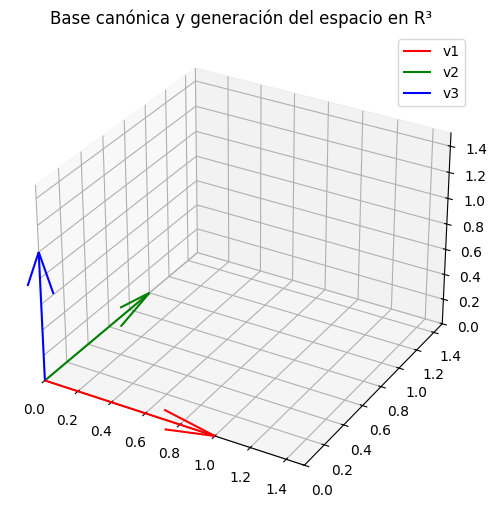

In [6]:
v1 = np.array([1, 0, 0])
v2 = np.array([0, 1, 0])
v3 = np.array([0, 0, 1])

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0,0,0,*v1,color='red',label='v1')
ax.quiver(0,0,0,*v2,color='green',label='v2')
ax.quiver(0,0,0,*v3,color='blue',label='v3')

ax.set_xlim(0,1.5)
ax.set_ylim(0,1.5)
ax.set_zlim(0,1.5)
ax.legend()
ax.set_title("Base canónica y generación del espacio en R³")
plt.show()

> Esta base canónica genera **todo $\mathbb{R}^3$**, ya que cualquier punto puede representarse como una combinación de $\mathbf{e_1}, \mathbf{e_2}, \mathbf{e_3}$.

---

## 🔹 6. Implementaciones útiles

In [7]:
def espacio_generado(*vectores, n_puntos=100):
    """Genera una muestra de combinaciones lineales en R3 para visualización."""
    a = np.linspace(-2, 2, n_puntos)
    b = np.linspace(-2, 2, n_puntos)
    c = np.linspace(-2, 2, n_puntos)
    
    V = np.column_stack(vectores)
    puntos = []
    for i in range(0, n_puntos, 10):
        for j in range(0, n_puntos, 10):
            for k in range(0, n_puntos, 10):
                punto = a[i]*V[:,0] + b[j]*V[:,1] + c[k]*V[:,2]
                puntos.append(punto)
    return np.array(puntos)

# Ejemplo
v1 = np.array([1, 0, 0])
v2 = np.array([0, 1, 0])
v3 = np.array([0, 0, 1])
puntos = espacio_generado(v1, v2, v3)

print("Número de puntos generados:", len(puntos))


Número de puntos generados: 1000


---

## 🧩 7. Ejercicios sugeridos de programación

1. **Verificador de generación:**
   Crea una función `tipo_subespacio(v1, v2, v3)` que indique si los tres vectores generan una línea, un plano o todo el espacio según el valor del determinante.

2. **Explorador visual:**
   Diseña un programa que permita ingresar hasta tres vectores y los grafique mostrando:

   * Si son dependientes o independientes
   * Qué subespacio generan
   * Su volumen generado (valor absoluto del determinante)

3. **Sistema lineal asociado:**
   Implementa un algoritmo que, dado un conjunto ${v_1, v_2, v_3}$ y un vector $\mathbf{b}$, determine si $\mathbf{b}$ pertenece al subespacio generado (es decir, si el sistema $A\mathbf{x} = \mathbf{b}$ tiene solución).

4. **Animación de combinaciones:**
   Crea una animación que muestre cómo varían los puntos generados al cambiar los escalares $\alpha_1, \alpha_2, \alpha_3$.

5. **Visualización de bases alternativas:**
   Dibuja en 3D tres vectores independientes distintos de la base estándar y muestra cómo siguen generando todo el espacio.



In [8]:
# Resuelve aqui

---

## 📚 Conclusión

Las **combinaciones lineales** son el mecanismo fundamental para construir nuevos vectores a partir de otros.
En $\mathbb{R}^3$ pueden generar:

* Una **recta**, si todos los vectores son proporcionales.
* Un **plano**, si dos vectores son independientes.
* Todo el **espacio**, si tres vectores son independientes.

> 💬 Comprender las combinaciones lineales es esencial para analizar **subespacios, bases y transformaciones lineales**, pilares del álgebra vectorial moderna.

---

✅ **Próximo tema:** [Subespacios en $\mathbb{R}^3$](subespacios.ipynb) — aprenderás a identificar, representar y comprobar propiedades de subespacios vectoriales en el espacio tridimensional.
